# Import Libraries

In [206]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Loading Dataset

In [4]:
train = pd.read_csv("C://Users//ACER//Downloads/train.csv")
test = pd.read_csv("C://Users//ACER//Downloads/test_QoiMO9B.csv")
meal = pd.read_csv("C://Users//ACER//Downloads/meal_info.csv")
fullfilment = pd.read_csv("C://Users//ACER//Downloads/fulfilment_center_info.csv")


## Merging the files

In [6]:
train = pd.merge(train,fullfilment, on="center_id")
test = pd.merge(test,fullfilment, on="center_id")

In [7]:
train = pd.merge(train,meal, on="meal_id")
test = pd.merge(test,meal, on="meal_id")

# Data Understanding

In [9]:
train.columns.tolist()

['id',
 'week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'city_code',
 'region_code',
 'center_type',
 'op_area',
 'category',
 'cuisine']

# Column Description
id : Unique ID \
week : Week No\
center_id :	Unique ID for fulfillment center\
meal_id	: Unique ID for Meal\
checkout_price : Final price including discount, taxes & delivery charges\
base_price : Base price of the meal\
emailer_for_promotion : Emailer sent for promotion of meal\
homepage_featured :	Meal featured at homepage\
num_orders(Target) : Orders Count\
city_code : Unique code for city\
region_code : Unique code for region\
center_type : Anonymized center type\
op_area : Area of operation (in km^2)\
category : Type of meal (beverages/snacks/soups….)\
cuisine : Meal cuisine (Indian/Italian/…)

## Shape of Dataset

In [12]:
print("No.of rows:", train.shape[0])
print("No.of columns:", train.shape[1])

No.of rows: 456548
No.of columns: 15


In [13]:
print("No.of rows:", test.shape[0])
print("No.of columns:", test.shape[1])

No.of rows: 32573
No.of columns: 14


## Size of Dataset

In [15]:
print("Size of dataset:",train.size)

Size of dataset: 6848220


## Identifying Data Types

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

## Checking for missing values

In [19]:
print("Sum of null values in each column :\n",train.isna().sum())

Sum of null values in each column :
 id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64


In [20]:
print("Sum of null values in each column :\n",test.isna().sum())

Sum of null values in each column :
 id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64


<Axes: >

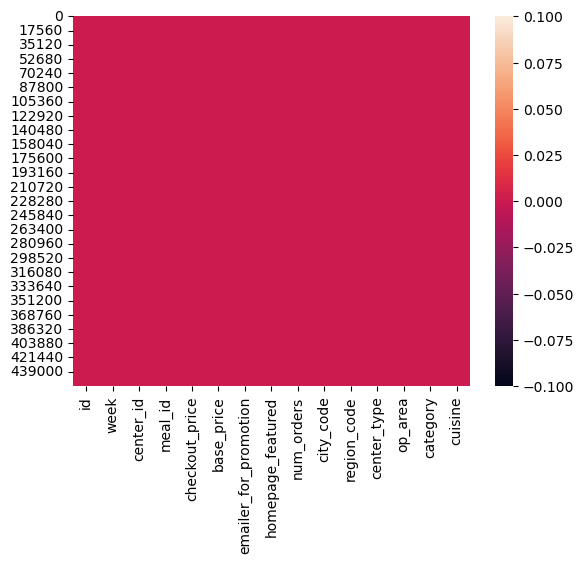

In [21]:
sns.heatmap(train.isna())

## Checking for Duplicate Rows

In [23]:
print("Total duplicate rows:", train.duplicated().sum())

Total duplicate rows: 0


In [24]:
print("Total duplicate rows:", test.duplicated().sum())

Total duplicate rows: 0


In [25]:
df = train.copy()

# Exploratory Data Analysis (EDA)

In [27]:
# List of numerical columns
numerical_columns = ['id','week','center_id','meal_id','checkout_price','base_price','emailer_for_promotion','num_orders','homepage_featured','city_code','region_code','op_area']
# List of categorical columns
categorical_columns = ['center_type','category','cuisine']

C:\Users\ACER\AppData\Local\Temp\ipykernel_22308\3637460455.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Set2')
C:\Users\ACER\AppData\Local\Temp\ipykernel_22308\3637460455.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Set2')
C:\Users\ACER\AppData\Local\Temp\ipykernel_22308\3637460455.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Set2')
C:\Users\ACER\AppData\Local\Temp\ipykernel_22308\3637460455.py:5: FutureWarning: 

Passing `palette` without assigning `h

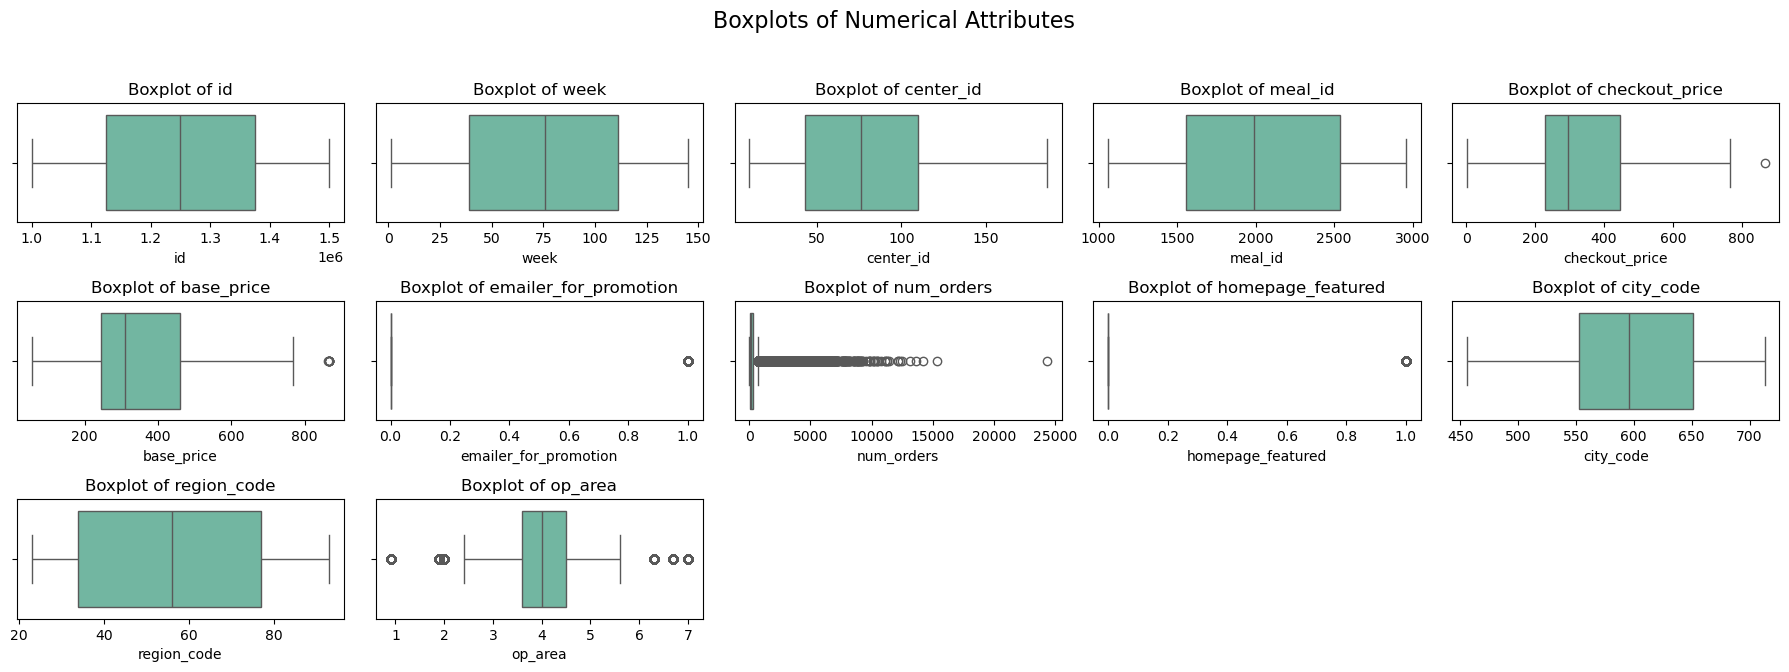

In [28]:
# Boxplots
plt.figure(figsize=(18, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5,5, i)  
    sns.boxplot(x=df[column], palette='Set2')
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

plt.suptitle("Boxplots of Numerical Attributes", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


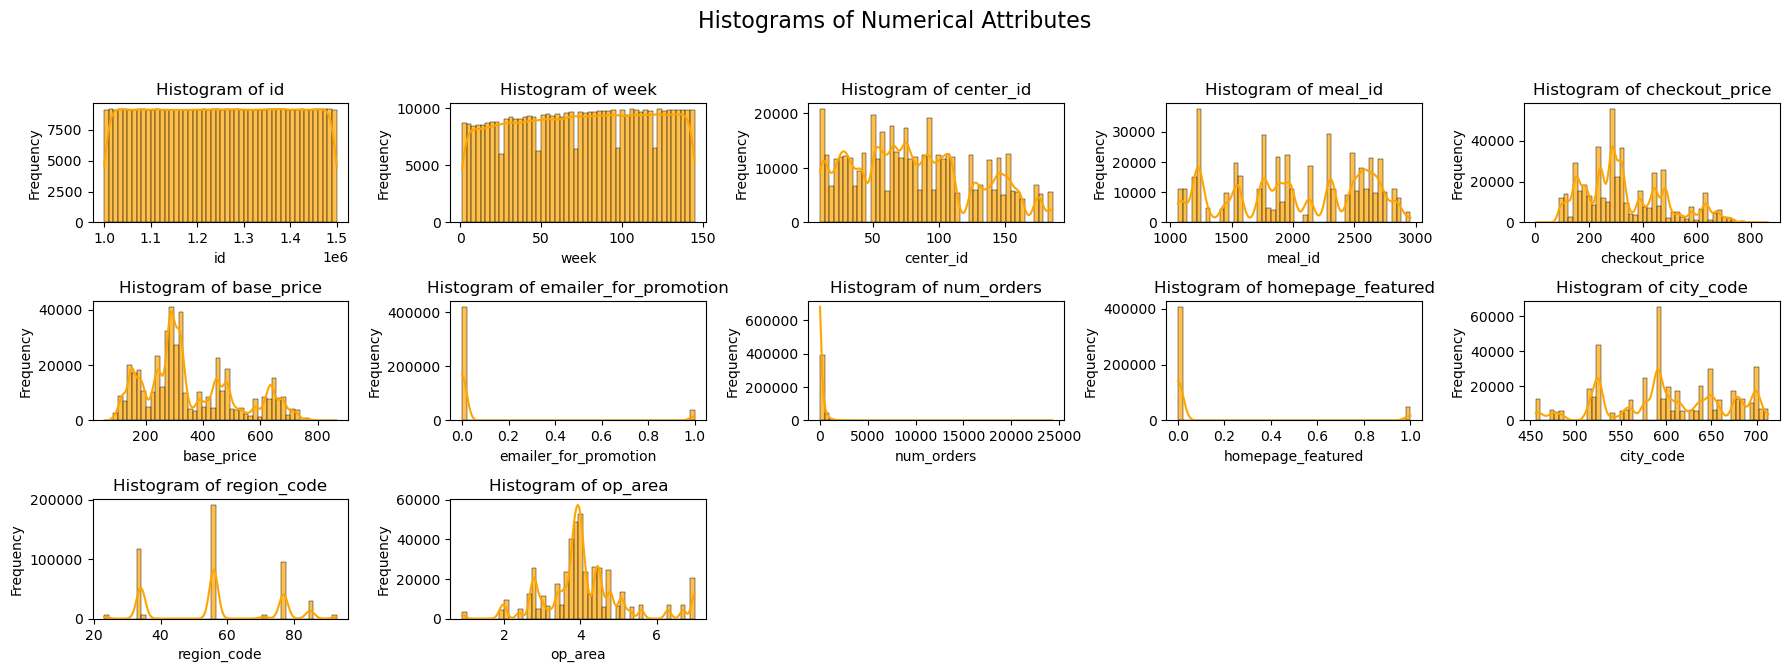

In [29]:
# Histograms
plt.figure(figsize=(18, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i)  
    sns.histplot(df[column], kde=True, bins=50, color='orange', alpha=0.7)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.suptitle("Histograms of Numerical Attributes", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### Categorical Variables

C:\Users\ACER\AppData\Local\Temp\ipykernel_22308\553412709.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=df[column], palette='Set2')
C:\Users\ACER\AppData\Local\Temp\ipykernel_22308\553412709.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=df[column], palette='Set2')
C:\Users\ACER\AppData\Local\Temp\ipykernel_22308\553412709.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=df[column], palette='Set2')


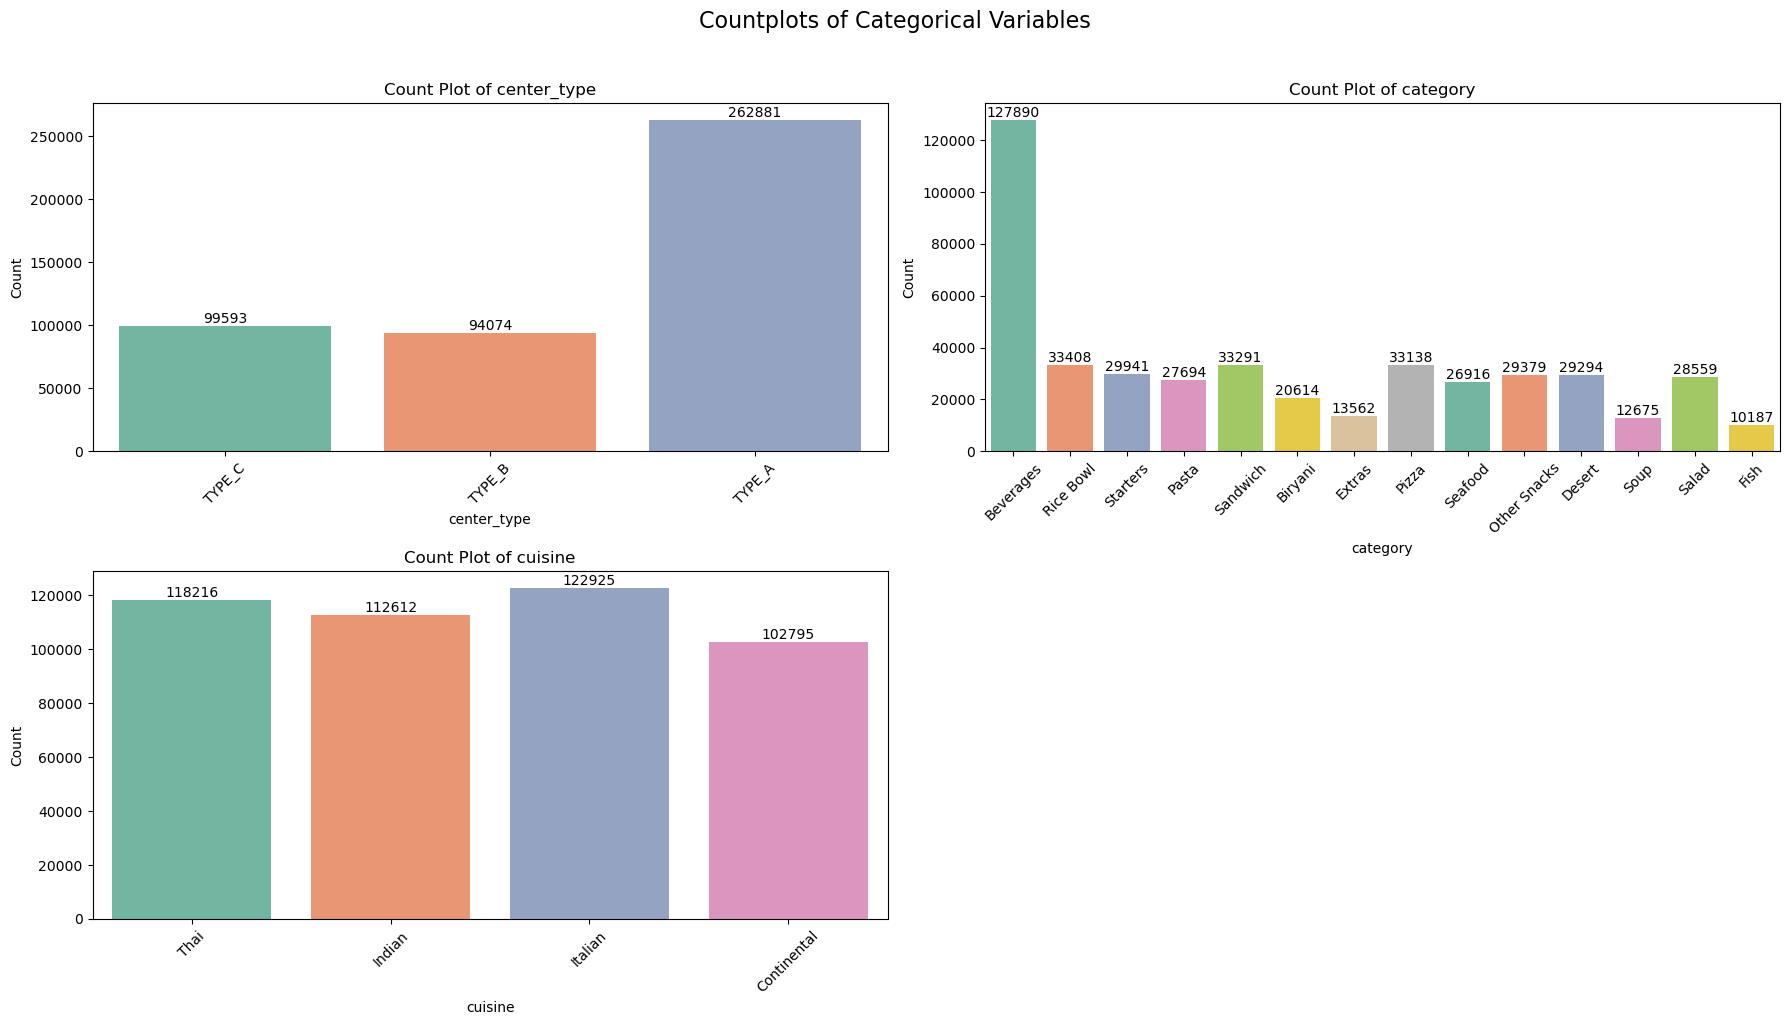

In [31]:
# count plot
plt.figure(figsize=(18, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)  
    ax = sns.countplot(data=df, x=df[column], palette='Set2')

    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.0f')

    plt.title(f"Count Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.tick_params(axis='x', rotation=45) 

plt.suptitle("Countplots of Categorical Variables", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

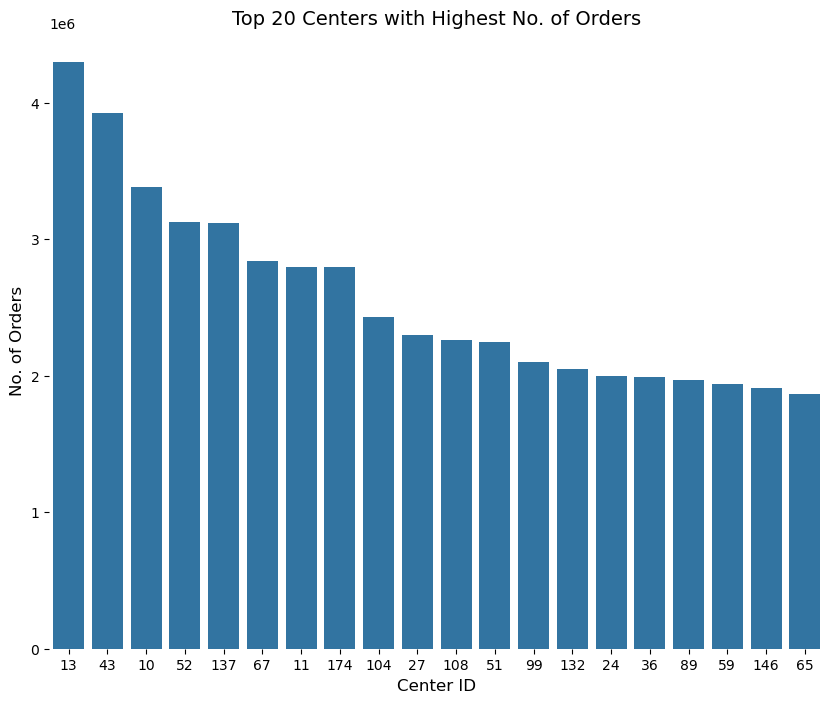

In [83]:
fig=plt.figure(figsize=(10,8))
plt.title('Top 20 Centers with Highest No. of Orders',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='center_id', data=df.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20),order=list(df.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20)['center_id']));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Center ID',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


## Feature Engineering

In [73]:
#Discount Amount
df['discount amount']=df['base_price']-df['checkout_price']
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount amount
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3,15.46
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,2,2.0,0,3,-1.00
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,2,2.0,0,3,1.00
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,2,2.0,0,1,98.03
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,2,2.0,0,1,-1.00


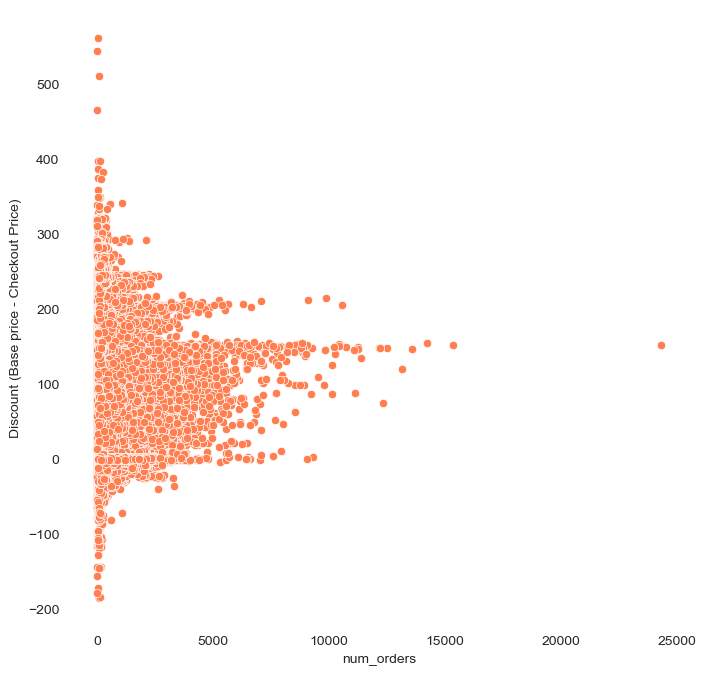

In [85]:
sns.set_style("white")
plt.figure(figsize=(8,8))
sns.scatterplot(y=df['base_price']-df['checkout_price'],x=df['num_orders'],color='coral')
plt.ylabel('Discount (Base price - Checkout Price)')
sns.despine(bottom = True, left = True)

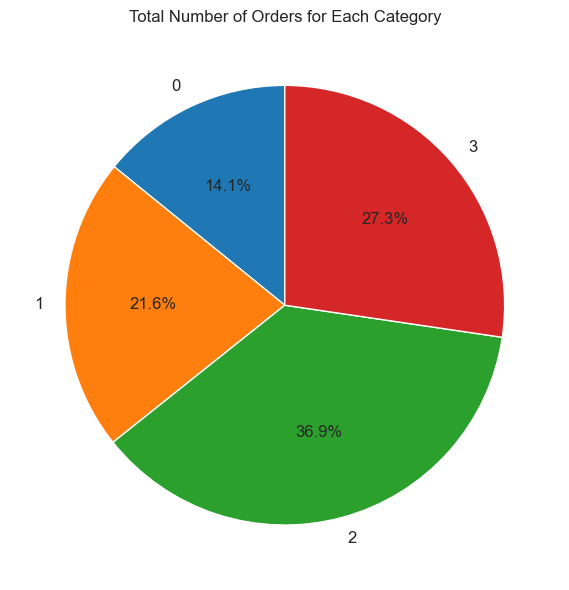

In [95]:
plt.figure(figsize=(6,6))
plt.pie(df.groupby(['cuisine']).num_orders.sum(),
    labels=df.groupby(['cuisine']).num_orders.sum().index,
    shadow=False,
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Total Number of Orders for Each Category')
plt.tight_layout()
plt.show()

<Axes: >

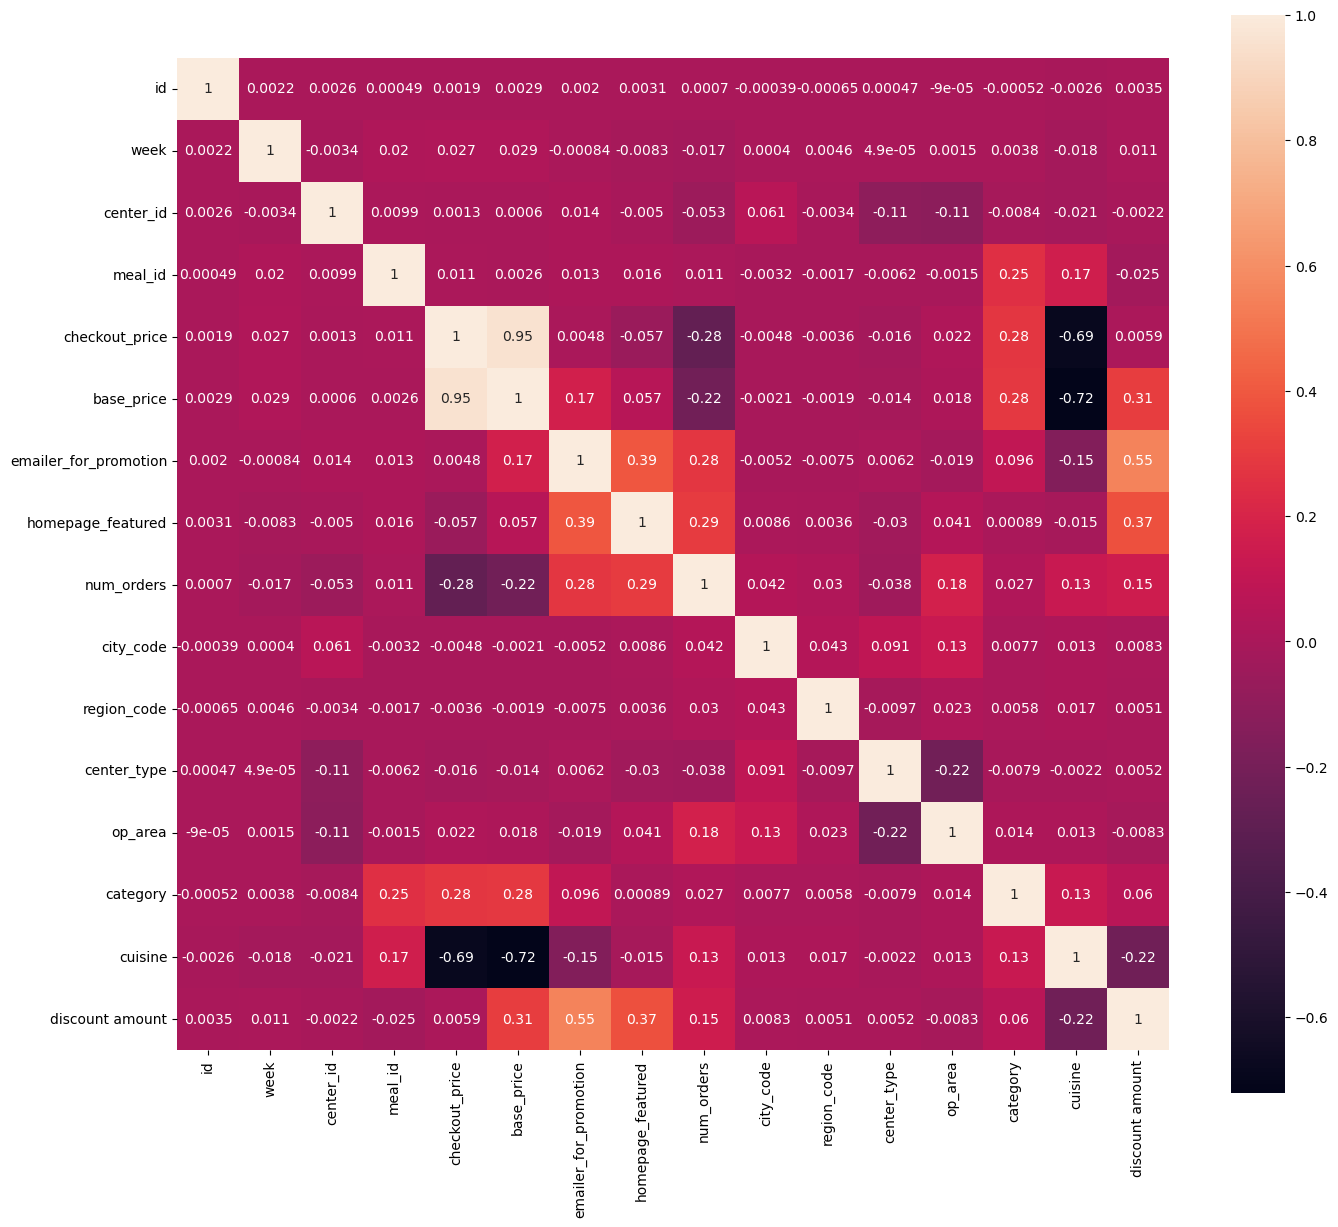

In [81]:
num_attributes2 = df.select_dtypes(exclude='object')
corr = num_attributes2.corr()
plt.figure(figsize=(16,14))
sns.heatmap(num_attributes2.corr(),annot=True, square=True,)

## Feature Encoding

In [62]:
df.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
city_code                    51
region_code                   8
center_type                   3
op_area                      30
category                     14
cuisine                       4
dtype: int64

In [57]:
encoder=LabelEncoder()
encoder2=LabelEncoder()
encoder3=LabelEncoder()

In [64]:
df['category']=encoder.fit_transform(df['category'])
df['center_type']=encoder2.fit_transform(df['center_type'])
df['cuisine']=encoder3.fit_transform(df['cuisine'])
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,2,2.0,0,3
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,2,2.0,0,3
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,2,2.0,0,1
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,2,2.0,0,1


In [118]:
ds = test.copy()

In [120]:
ds['discount amount']=ds['base_price']-ds['checkout_price']
ds.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,discount amount
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,1.0
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,-1.0
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai,2.0
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0,Beverages,Indian,0.0
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0,Beverages,Indian,0.0


In [122]:
ds['category']=encoder.fit_transform(ds['category'])
ds['center_type']=encoder2.fit_transform(ds['center_type'])
ds['cuisine']=encoder3.fit_transform(ds['cuisine'])
ds.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,discount amount
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,2,2.0,0,3,1.0
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,2,2.0,0,3,-1.0
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,2,2.0,0,3,2.0
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,2,2.0,0,1,0.0
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,2,2.0,0,1,0.0


## Train Test Split

In [165]:
df1= df.drop(['id'], axis=1)
correlation = df1.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'discount amount', 'cuisine', 'city_code', 'region_code'],
      dtype='object')

In [167]:
features = columns.drop(['num_orders'])
df2 = df[features]
x = df2.values
y = df['num_orders'].values

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [171]:
x_train.shape

(365238, 7)

In [235]:
ds1 = ds.drop(columns=['id','center_id','meal_id','week','checkout_price','base_price','center_type','discount amount'],axis=1)
ds1.head()

,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category,cuisine
0,0,0,647,56,2.0,0,3
1,0,0,647,56,2.0,0,3
2,0,0,647,56,2.0,0,3
3,0,0,647,56,2.0,0,1
4,0,0,647,56,2.0,0,1


## Model Building

In [215]:
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))

RMSLE: 111.7088846552666


In [219]:
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
y_pred2 = RF.predict(x_test)
y_pred2[y_pred2<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred2)))


RMSLE: 108.28377274528715


In [213]:
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred3 = LR.predict(x_test)
y_pred3[y_pred3<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred3)))

RMSLE: 129.3590965114655


In [221]:
KNN = KNeighborsRegressor()
KNN.fit(x_train, y_train)
y_pred4 = KNN.predict(x_test)
y_pred4[y_pred4<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred4)))

RMSLE: 114.98295658693856


## Using Test Data for Prediction

In [238]:
pred_test_data= RF.predict(ds1)
pred_test_data[pred_test_data<0] = 0

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [240]:
submit = pd.DataFrame({
    'id' :ds['id'],
    'num_orders' : pred_test_data
})

In [246]:
submit

,id,num_orders
0,1028232,912.19
1,1127204,912.19
2,1212707,912.19
3,1082698,912.19
4,1400926,912.19
...,...,...
32568,1250239,381.51
32569,1039516,381.51
32570,1158107,381.51
32571,1444235,381.51


In [248]:
submit.to_csv("C://Users//ACER//Downloads/submission_food.csv", index=False)